In [50]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import math
import requests
# from pandas import json_normalize
from pandas.io.json import json_normalize
import numpy as np
# from pitch import Pitch


In [53]:
def Pitch(ax, height = 120,  width=80, line_color = "black", pitch_color = "white", mode = "full", pitch_linewidth = 1):

    def int_angles(radius, h, k, line_x):
        """
        Calculate the intersection angles of the arc above the D-boxes
        
        Parameters: 
            radius (float): Radius of the arc
            h(float): x coordinate of the centre of the arc
            k(float): y coordiante of the centre of the arc
            line_x(float): x coordinate of the D-box or the line to be intersected by the arc
      
        Returns: 
            theta1(float): First intersection angle
            theta2(float): Second intersection angle
        """
        y1 = math.sqrt(radius**2 - (line_x - h)**2) + k
        y2 = math.sqrt(radius**2 - (line_x - h)**2)*-1 + k
        y = (y1-y2)/2
        theta1 = math.degrees(math.asin(y/radius))
        theta2 = 360-theta1

        return theta1, theta2

    
    #Pitch Outline
    ax.plot([0,0],[0,width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([0,height],[width,width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([height,height],[width,0], color=line_color, linewidth = pitch_linewidth)
    ax.plot([height,0],[0,0], color=line_color, linewidth = pitch_linewidth)

    
    ##Halfway-line
    ax.plot([height/2, height/2],[0,width], color=line_color, linewidth = pitch_linewidth)

    #Left Penalty Area
    ax.plot([0,.15*height],[.225*width, .225*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.15*height, .15*height],[.225*width,0.775*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.15*height,0],[.775*width, .775*width], color=line_color, linewidth = pitch_linewidth)

    #Right Penalty Area
    ax.plot([.85*height,height],[.15*height, .15*height], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.85*height,.85*height],[.15*height, .775*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.85*height,height],[.775*width, .775*width], color=line_color, linewidth = pitch_linewidth)
    
    #6-yard box left
    ax.plot([0,.05*height],[.375*width, .375*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.05*height, .05*height],[.375*width,width - .375*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([0,.05*height],[.625*width, .625*width ], color=line_color, linewidth = pitch_linewidth)    

    #6-yard box right
    ax.plot([.95*height,height],[.375*width, .375*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.95*height,114],[.375*width, .625*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.95*height,height],[.625*width, .625*width], color=line_color, linewidth = pitch_linewidth)

      
        #Prepare Circles
    centreCircle = plt.Circle((height/2, width/2),.076*height,color=line_color,fill=False, zorder=5)
    centreSpot = plt.Circle((height/2, width/2),0.8,color=line_color)
    leftPenSpot = plt.Circle((.1*height,40),0.8,color=line_color)
    rightPenSpot = plt.Circle((.9*height,40),0.8,color=line_color)

                
        #Prepare Arcs
    theta1, theta2 = int_angles(radius = height/12,
                                h = .1*height,
                                k= width/2,
                                line_x = .15*height)

    
    leftArc = Arc((.1*height,40),
                              height=0.15*height,
                              width=0.15*height,
                              angle=0,
                              theta1=theta2,
                              theta2=theta1,
                              color=line_color,
                              zorder=5)
    
    theta1, theta2 = int_angles(radius = height/12,
                                h = .9*height,
                                k= width/2,
                                line_x = .85*height)
    
    rightArc = Arc((.9*height,40),
                               height=0.15*height,
                               width=0.15*height,
                               angle=180,
                               theta1=theta2,
                               theta2=theta1,
                               color=line_color,
                               zorder=5)

        ##Add corner arcs
    left_bottom = Arc((0,0),
                  height=.05*height,
                  width=0.05*height,
                  angle=270,
                  theta1=90,
                  theta2=180,
                  color=line_color,
                  zorder=5)

    left_top = Arc((0,width),
                  height=.05*height,
                  width=0.05*height,
                  angle=0,
                  theta1=270,
                  theta2=0,
                  color=line_color,
                   zorder=5)

    right_bottom = Arc((height, 0),
                  height=.05*height,
                  width=0.05*height,
                  angle=0,
                  theta1=90,
                  theta2=180,
                  color=line_color,
                   zorder=5    )
    
    right_top = Arc((height, width),
                  height=.05*height,
                  width=0.05*height,
                  angle=90,
                  theta1=90,
                  theta2=180,
                  color=line_color,
                   zorder=5 )    

    
        #Goals
    ax.plot([0,0],[.45*width, .55*width],color=line_color, linewidth = pitch_linewidth*4)
    ax.plot([height, height],[.45*width, .55*width],color=line_color, linewidth = pitch_linewidth*4)

        #Add patches
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    if mode == "full":
        ax.add_patch(left_bottom)
        ax.add_patch(left_top)
        ax.add_patch(right_bottom)
        ax.add_patch(right_top)

    ax.set_aspect("equal")
    ax.axis("off")

    return ax

#### Campo 

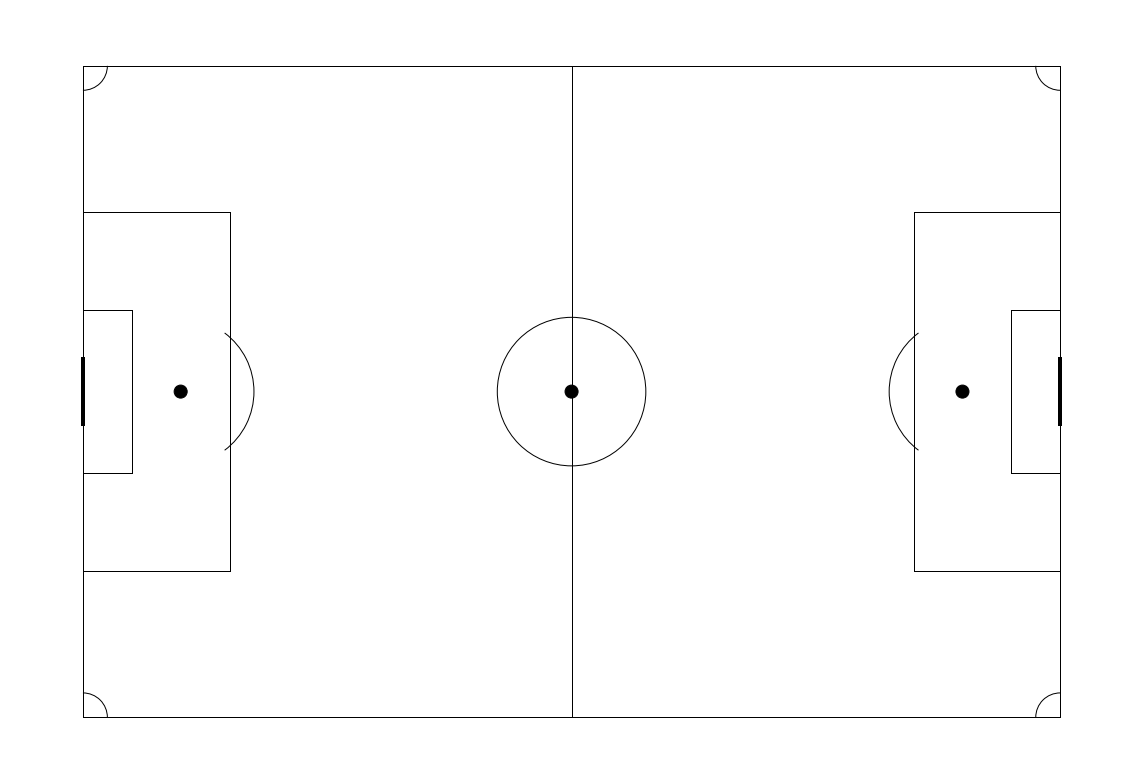

In [54]:
fig, ax = plt.subplots(figsize=(17,11))
ax = Pitch(ax)
fig.tight_layout()
plt.show()

Statsbomb has a unique match_id for every match in the open-data repository. The match we’re going to look at is the FIFA WC 2018 Final between France and Croatia. 
The id for it is “8658” and let’s look at Croatia to start with (which was the away side in the match).
Let’s set some variables to that data and also grab our figure and axis instances from matplotlib.

**Elegimos el lado home Francia y away Croacia**

In [55]:
match_id = "8658"
side = "away" # away Croacia y home Francia
color = "blue"
min_pass_count = 2 ## Número minimo e pases en una conexión para ser mostrado en el mapa de pases

# fig, ax = plt.subplots()
# ax = Pitch(ax)

### Class Player
The next step would be to write a Class called Player. 
Why do that? Well, if you think about it, a player is basically an object with certain attributes - name,
a unique player_id, and on whom we can run some methods - like calculate the total number of passes attempted completed, or their average position on the pitch. That’s pretty much the textbook definition of an object!

In [56]:
class Player:
    def __init__(self, player, df):
        self.id = player["player"]["id"]
        self.name = player["player"]["name"]
        self.average_position(df)

    def average_position(self, df):

        player_pass_df = df.query("(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) & (player_id == @self.id) & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
        self.x, self.y = np.mean(player_pass_df['location'].tolist(), axis=0)

        self.n_passes_completed = len(player_pass_df)


## Load Data
We can either load the data from the Github repository online or from your local copy of it. Let’s write a function to take care of both cases. We’re going to tell the function which match (match_id), and how to get the data (remote/local). It’s gonna return the data (which is going to be in JSON format) and also the data formatted to a Pandas dataframe.

In [57]:
def load_file(match_id, getter="remote", path = None):
    
    if getter == "local":
        with open(f"{path}/{match_id}.json", "r", encoding="utf-8") as f:
            match_dict = json.load(f)
            df = json_normalize(match_dict, sep="_")
        return match_dict, df
    
    elif getter == "remote":
        resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json")

        match_dict = json.loads(resp.text)
        df = json_normalize(match_dict, sep="_")

        return match_dict, df

I know for a fact that every match JSON file contains the lineups for both teams as the first two dictionaries in our list. Let’s go ahead and look at it ourselves.

`print(match_dict[0])`

"""{'id': '47638847-fd43-4656-b49c-cff64e5cfc0a', 'index': 1, 'period': 1, 'timestamp': '00:00:00.000', 'minute': 0,
 'second': 0, 'type': {'id': 35, 'name': 'Starting XI'}, 'possession': 1,'possession_team': {'id': 771, 'name': 'France'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'}, 'team': {'id': 771, 'name': 'France'}, 'duration': 0.0,
  'tactics': {'formation': 442, 'lineup':
  [{'player': {'id': 3099, 'name': 'Hugo Lloris'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 1},
  {'player': {'id': 5476, 'name': 'Benjamin Pavard'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 2},
  {'player': {'id': 5485, 'name': 'Raphaël Varane'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 4},
  {'player': {'id': 5492, 'name': 'Samuel Yves Umtiti'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 5},
   {'player': {'id': 5484, 'name': 'Lucas Hernández Pi'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 21},
   {'player': {'id': 20004, 'name': 'Paul Pogba'}, 'position': {'id': 9, 'name': 'Right Defensive Midfield'}, 'jersey_number': 6},
   {'player': {'id': 3961, 'name': 'N"Golo Kanté'}, 'position': {'id': 11, 'name': 'Left Defensive Midfield'}, 'jersey_number': 13},
   {'player': {'id': 3009, 'name': 'Kylian Mbappé Lottin'}, 'position': {'id': 12, 'name': 'Right Midfield'}, 'jersey_number': 10},
   {'player': {'id': 4375, 'name': 'Blaise Matuidi'}, 'position': {'id': 16, 'name': 'Left Midfield'}, 'jersey_number': 14},
   {'player': {'id': 5487, 'name': 'Antoine Griezmann'}, 'position': {'id': 22, 'name': 'Right Center Forward'}, 'jersey_number': 7},
   {'player': {'id': 3604, 'name': 'Olivier Giroud'}, 'position': {'id': 24, 'name': 'Left Center Forward'}, 'jersey_number': 9}]}}"""

### Get starters
This is important because we need the names, and ids of the players who started the match. 
So let’s go ahead and write a small function to get all that data from the dictionary.

In [58]:
def get_starters(match_dict, side="home"):
    """ """
    lineups = match_dict[0]["tactics"]["lineup"] if side == "home" else match_dict[1]["tactics"]["lineup"]
    return lineups


Let’s go ahead and call our functions to get the data and the lineups.

In [59]:
match_dict, df = load_file(match_id, getter="remote")
lineups = get_starters(match_dict, side=side)

<ipython-input-57-f6dd74b9814b>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(match_dict, sep="_")


In [60]:
side_dict = {"home": match_dict[0]["team"]["name"],
             "away": match_dict[1]["team"]["name"] }

print(side_dict)

{'home': 'France', 'away': 'Croatia'}


Now we are going to create Player objects out of all the players in our lineups list and put them all together in a dictionary.

In [61]:
player_objs_dict = {}
starters = []
for player in lineups:
    starters.append(player["player"]["name"]) ##To remove all substitutes from our final grouped_df
    p = Player(player, df) ##Calling the Player class
    player_objs_dict.update({player["player"]["name"]: p}) ##For lookup during plotting the grouped_df


### Data-cleaning

Now we clean up the events dataframe a little. The first step is to get only the events which are only open-play passes and only passes by the side we’ve chosen, and only those that are successful. We chain all these filters together using the query method.

The next part is to group these passes together based on the player who passed the ball and the one who received the ball. For example, if Modric passed to Brozovic four times in the entire match, we are gonna have four separate rows in total_pass_df for it. But when we apply the groupby method, that’s compressed into a single row with the new column count reflecting the value four.

The final step is to get only the players who were in the starters list and the minimum passes played between them is greater than or equal to a certain value - I’m gonna go with 2. This is initialised right at the beginning 

In [62]:
total_pass_df = df.query(f"(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) &"\
                                 f"(team_name == '{side_dict[side]}') & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")

total_pass_df = total_pass_df.groupby(["player_name", "pass_recipient_name"]).size().reset_index(name="count")

total_pass_df = total_pass_df.query(" (player_name == @starters) & (pass_recipient_name == @starters) & (count>=@min_pass_count) ")


### Here’s our final dataframe 

In [63]:
total_pass_df

,player_name,pass_recipient_name,count
8,Ante Rebić,Ivan Perišić,2
12,Ante Rebić,Šime Vrsaljko,2
13,Danijel Subašić,Dejan Lovren,4
14,Danijel Subašić,Domagoj Vida,3
16,Dejan Lovren,Danijel Subašić,3
...,...,...,...
92,Šime Vrsaljko,Ivan Perišić,6
93,Šime Vrsaljko,Ivan Rakitić,3
94,Šime Vrsaljko,Luka Modrić,9
95,Šime Vrsaljko,Marcelo Brozović,10


### Visualization

So far so good. Now’s the time to visualise our results. We’re going to iterate over our dataframe, grab the players who did the passing and receiving, grab the player_object of those two players from our `player_objs` dictionary and then grab their names, average positions, and their total passes.

You could go ahead and plot them right now using `ax.plot` and they’d look like this.

There’s room for some improvement though. We are not able to tell, between Player A and Player B, who passed more to whom. If Modric passes to Brozovic ten times in a match and Brozovic only returns the favour once, that information is lost to us because there’s just one thick line between both of them. For this reason, it might make sense to use arrows to denote direction but also make sure they’re not overlapping.

To do that, we use some if-else logic. We pick up a unique identifier for the players - the player_id will do just fine. Then we can compare the player_id - if player_id of Player A is greater than Player B, shift the arrow from A to B a little to the left. If B is greater than A, shift the arrow a little to the right. Basically, as seen in the figure below -

Note: We can also apply the same logic to players who are on the same line horizontally - the only difference would be that instead of shifting the arrow left and right, we’ll shift them a little up and a little down.

In [64]:
arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5 ##Units by which the arrow is shortened from the end_points

##Visualising the passmap

for row in total_pass_df.itertuples():

    link = row[3] ## for the arrow-width and the alpha
    passer = player_objs_dict[row[1]]
    receiver = player_objs_dict[row[2]]

    alpha = link/15
    if alpha >1:
        alpha=1

    if abs( receiver.x - passer.x) > abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x, receiver.y + arrow_shift), xytext=(passer.x, passer.y + arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw = link*0.12, alpha=alpha))

        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x, receiver.y - arrow_shift), xytext=(passer.x, passer.y - arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

    elif abs(receiver.x - passer.x) <= abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x + arrow_shift, receiver.y), xytext=(passer.x + arrow_shift, passer.y),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x - arrow_shift, receiver.y), xytext=(passer.x - arrow_shift, passer.y),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))


The final step of our visualisation is to add scatter points to the players’ locations and also annotate them with their last names. We can then add some extra heading and sub-heading information. Here’s our final result after all that’s taken care of

In [65]:
for name, player in player_objs_dict.items():

    ax.scatter(player.x, player.y, s=player.n_passes_completed*1.3, color=color, zorder = 4)
    ax.text(player.x, player.y+2 if player.y >40 else player.y -2, s=player.name.split(" ")[-1], rotation=270, va="top" if player.y<40 else "bottom", size=6.5, fontweight="book", zorder=7, color=color)

ax.text(124, 80, f"{side_dict[side]}", size=12, fontweight="demibold", rotation=270, color=color, va="top")
ax.text(122, 80, f"{side_dict['home']} vs {side_dict['away']}", size=8, fontweight="demibold", rotation = 270, va="top")

fig.tight_layout()
        
plt.show()

## Full dataviz

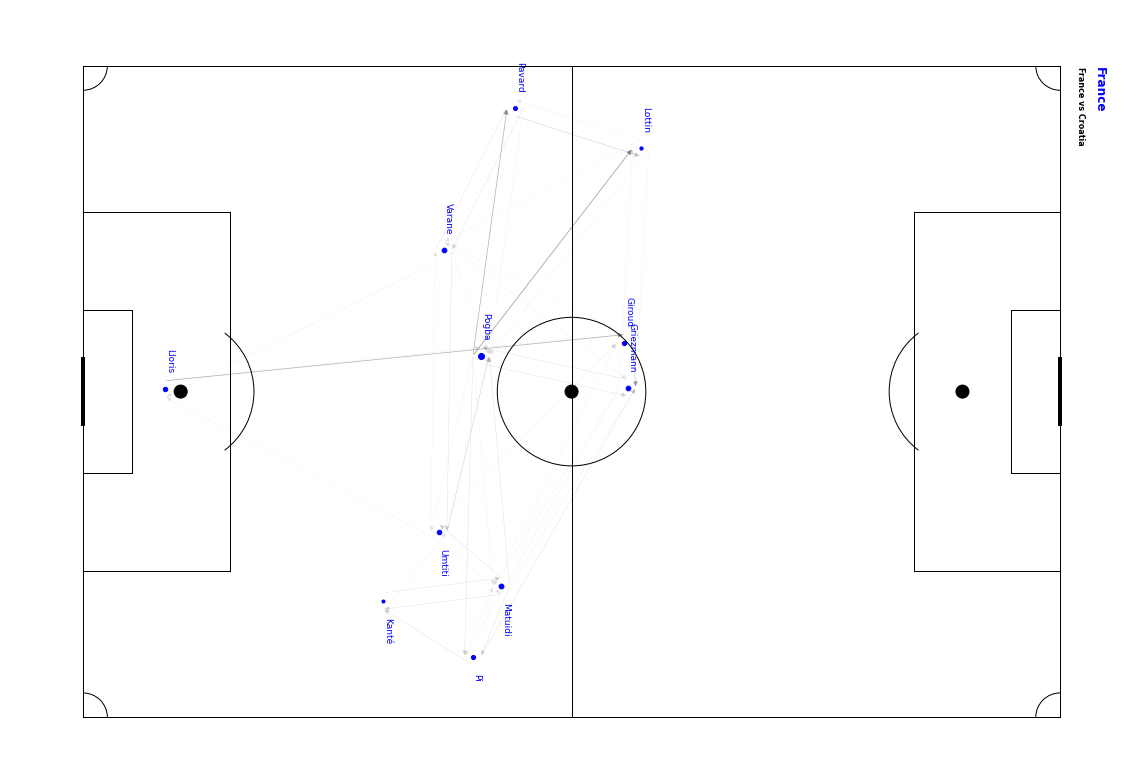

In [75]:
fig, ax = plt.subplots(figsize=(17,11))
ax = Pitch(ax)

arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5 ##Units by which the arrow is shortened from the end_points

##Visualising the passmap

for row in total_pass_df.itertuples():

    link = row[3] ## for the arrow-width and the alpha
    passer = player_objs_dict[row[1]]
    receiver = player_objs_dict[row[2]]

    alpha = link/15
    if alpha >1:
        alpha=1

    if abs( receiver.x - passer.x) > abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x, receiver.y + arrow_shift), xytext=(passer.x, passer.y + arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw = link*0.12, alpha=alpha))

        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x, receiver.y - arrow_shift), xytext=(passer.x, passer.y - arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

    elif abs(receiver.x - passer.x) <= abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x + arrow_shift, receiver.y), xytext=(passer.x + arrow_shift, passer.y),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x - arrow_shift, receiver.y), xytext=(passer.x - arrow_shift, passer.y),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))





for name, player in player_objs_dict.items():

    ax.scatter(player.x, player.y, s=player.n_passes_completed*1.3, color=color, zorder = 4)
    ax.text(player.x, player.y+2 if player.y >40 else player.y -2, s=player.name.split(" ")[-1], rotation=270, va="top" if player.y<40 else "bottom", size=9, fontweight="book", zorder=7, color=color)

ax.text(124, 80, f"{side_dict[side]}", size=12, fontweight="demibold", rotation=270, color=color, va="top")
ax.text(122, 80, f"{side_dict['home']} vs {side_dict['away']}", size=8, fontweight="demibold", rotation = 270, va="top")

fig.tight_layout()
        
plt.show()


# FULL CODE

### France vs Croatia 
* Match ID 8658
* Side away Croacia

<ipython-input-74-90b6d95896d2>:38: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(match_dict, sep="_")


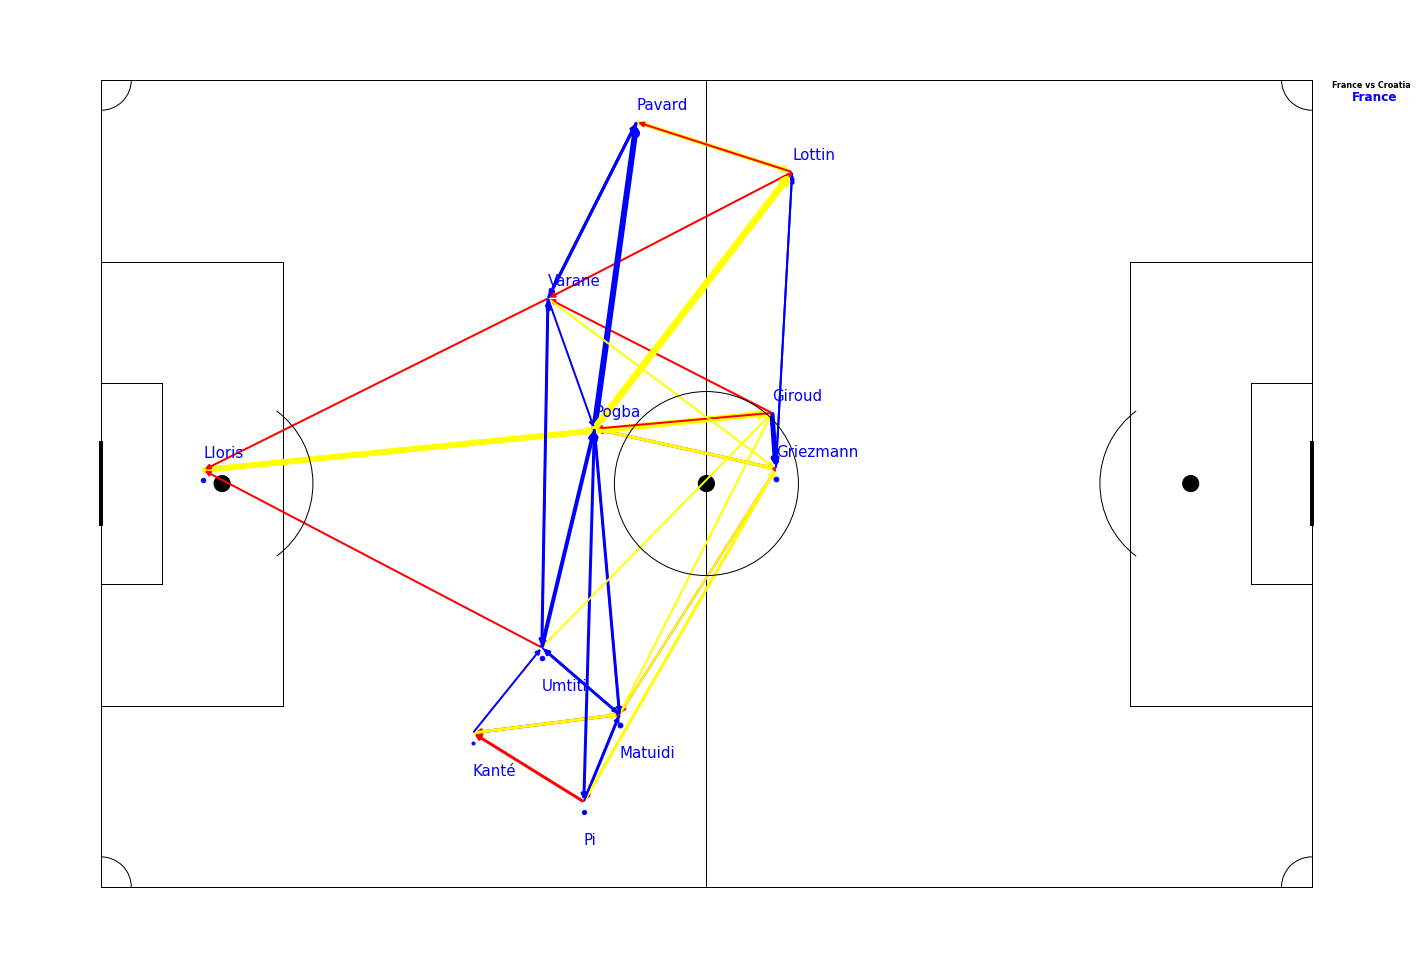

In [74]:
match_id = "8658"
side="home"
color="blue"
min_pass_count = 2 ##minimum number of passes for a link to be plotted

# fig, ax = plt.subplots(figsize=(10,6))
fig, ax = plt.subplots(figsize=(20,15))
ax = Pitch(ax)



class Player:
    def __init__(self, player, df):
        self.id = player["player"]["id"]
        self.name = player["player"]["name"]
        self.average_position(df)

    def average_position(self, df):

        player_pass_df = df.query("(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) & (player_id == @self.id) & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
        self.x, self.y = np.mean(player_pass_df['location'].tolist(), axis=0)

        self.n_passes_completed = len(player_pass_df)
        

def load_file(match_id, getter="remote", path = None):
    
    if getter == "local":
        with open(f"{path}/{match_id}.json", "r", encoding="utf-8") as f:
            match_dict = json.load(f)
            df = json_normalize(match_dict, sep="_")
        return match_dict, df
    
    elif getter == "remote":
        resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json")

        match_dict = json.loads(resp.text)
        df = json_normalize(match_dict, sep="_")

        return match_dict, df
    

def get_starters(match_dict, side="home"):
    """ """
    lineups = match_dict[0]["tactics"]["lineup"] if side == "home" else match_dict[1]["tactics"]["lineup"]
    return lineups

#######

##Calling the functions and getting the data
match_dict, df = load_file(match_id, getter="remote")
lineups = get_starters(match_dict, side=side)

side_dict = {"home": match_dict[0]["team"]["name"],
             "away": match_dict[1]["team"]["name"] } ##For easy lookup for the title and so on

player_objs_dict = {}
starters = []
for player in lineups:
    starters.append(player["player"]["name"]) ##To remove all substitutes from our final grouped_df
    p = Player(player, df) ##Calling the Player class
    player_objs_dict.update({player["player"]["name"]: p}) ##For lookup during plotting the grouped_df
    
##Cleaning the grouped df
    
total_pass_df = df.query(f"(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) &"\
                                 f"(team_name == '{side_dict[side]}') & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
total_pass_df = total_pass_df.groupby(["player_name", "pass_recipient_name"]).size().reset_index(name="count")
total_pass_df = total_pass_df.query(" (player_name == @starters) & (pass_recipient_name == @starters) & (count>=@min_pass_count) ")

arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5 ##Units by which the arrow is shortened from the end_points

##Visualising the passmap

for row in total_pass_df.itertuples():

    #print(row)
    link = row[3] ## for the arrow-width and the alpha
    passer = player_objs_dict[row[1]]
    receiver = player_objs_dict[row[2]]

    alpha = 1

    if (receiver.x - passer.x) < -10:
        color = "red"
    elif -10 < (receiver.x - passer.x) < 10: 
        color = "blue"     
    else: 
        color = "yellow"
           
    ax.annotate("", xy=(receiver.x, receiver.y + arrow_shift), xytext=(passer.x, passer.y + arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color=color, shrinkA=shrink_val, shrinkB=shrink_val, lw = link, alpha=alpha))

for name, player in player_objs_dict.items():

    ax.scatter(player.x, player.y, s=player.n_passes_completed*1.3, color=color, zorder = 4)
    ax.text(player.x, player.y+2 if player.y >40 else player.y -2, s=player.name.split(" ")[-1], rotation=0, va="top" if player.y<40 else "bottom", size=15, fontweight="book", zorder=7, color=color)

ax.text(124, 79, f"{side_dict[side]}", size=12, fontweight="demibold", rotation=0, color=color, va="top")
ax.text(122, 80, f"{side_dict['home']} vs {side_dict['away']}", size=8, fontweight="demibold", rotation = 0, va="top")

fig.tight_layout()
        
plt.show()